In [1]:
#importing the libraries before using them
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
#import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score

# Data cleaning and preprocessing

In [2]:
#uploading the csv dataset and converting into the dataframe
dataset = pd.read_csv('input.csv',index_col="date",parse_dates=True)
#figuring out missing values in the dataset
dataset.isna().sum()


Unnamed: 0    0
close         0
high          0
low           0
open          0
NVT           0
dtype: int64

In [3]:
# propagate last valid observation forward to the next valid observation if theres a NAN value
dataset.fillna(method='ffill',inplace=True)
#rechecking for missing values
dataset.isna().sum()


Unnamed: 0    0
close         0
high          0
low           0
open          0
NVT           0
dtype: int64

In [4]:
dataset.tail()

,Unnamed: 0,close,high,low,open,NVT
date,,,,,,
2023-02-24,2186,1608.825942,1609.737480,1603.595105,1603.595105,95.804672
2023-02-25,2187,1594.292253,1594.548527,1590.587467,1590.756761,155.020116
2023-02-26,2188,1639.417918,1640.586305,1631.641675,1631.641675,143.036149
2023-02-27,2189,1633.450078,1635.025750,1631.954201,1632.693323,79.292695
2023-02-28,2190,1606.638136,1612.068031,1606.638136,1612.068031,108.004038


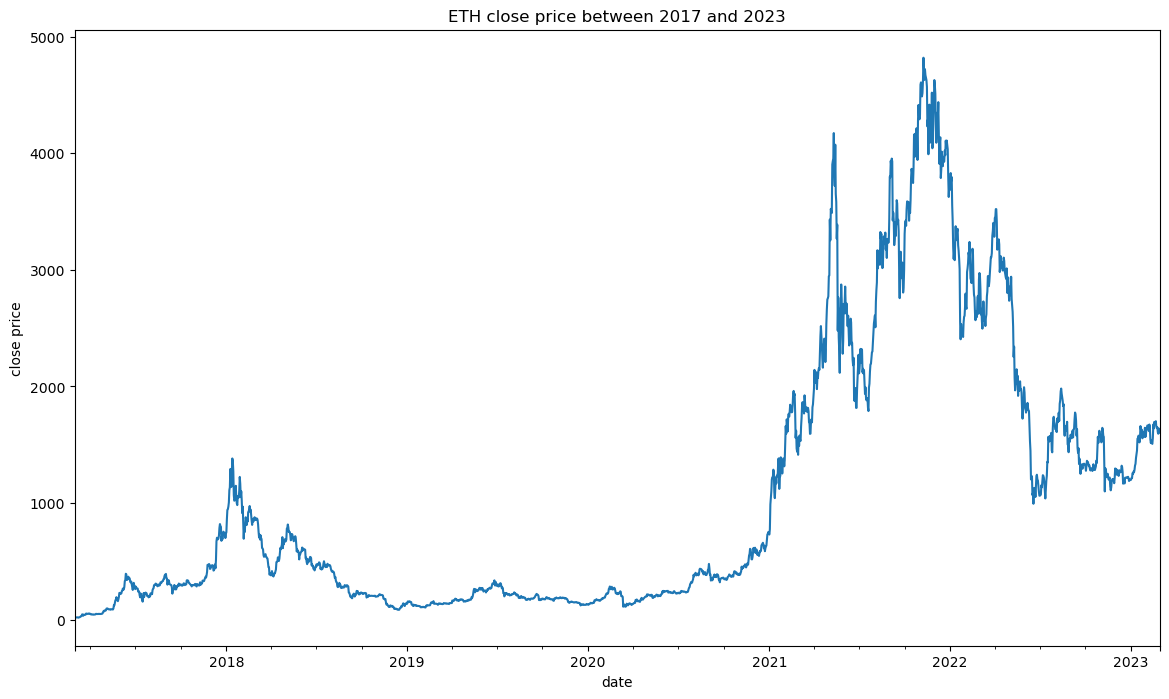

In [5]:
open_price=dataset['close']
open_price = open_price.plot(figsize=(14, 8), title="ETH close price between 2017 and 2023")
open_price.set_ylabel("close price")

plt.show()


# Creating the Model

In [6]:
#plitting the  data into train and test set: 90% / 10%
from sklearn import linear_model
#dates = pd.DataFrame(np.arange(len(dataset)))
#open = dataset['open']
x_index = ['high','low','open','NVT']
y_index = ['close']
x_train, x_test, y_train, y_test = train_test_split(dataset[x_index], dataset[y_index], test_size = 0.1, random_state = 1)

In [7]:
model = linear_model.LinearRegression()
# Fit linear model using the train data set
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# The coefficient
print('Slope: ', np.squeeze(model.coef_)[0])
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.8743494678197755
Intercept:  [0.13722147]


# Model evaluation

In [9]:
# Generating array with predicted values
y_pred = model.predict(x_test)

In [10]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [17]:
# Statistical summary of test data
dataset['close'].describe()

count    2191.000000
mean     1034.332712
std      1143.315402
min        16.580000
25%       206.694674
50%       416.298000
75%      1602.072191
max      4819.010984
Name: close, dtype: float64

In [12]:
from math import sqrt
TM_MSE = np.mean((y_pred - y_test) ** 2)
TM_RMSE = sqrt(TM_MSE)

print ('Coefficients:', model.coef_)
print ('Variance score', model.score(x_test, y_test))
print ('Mean Squared Error (MSE)', TM_MSE)
print ('Root Mean Squared Error (RMSE)', TM_RMSE)

Coefficients: [[ 0.87434947  0.93725749 -0.81125097 -0.00265293]]
Variance score 0.9999861924337404
Mean Squared Error (MSE) 15.879756291699886
Root Mean Squared Error (RMSE) 3.9849411904945207


In [13]:
#Accuracy calculation :
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9999861924337404


In [14]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9999864188633184

# Covariance check

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Remove columns that do not participate in covariance checking
cols_to_check = dataset.columns.drop('close')
df_subset = dataset[cols_to_check]

# Calculate the correlation coefficient matrix
corr_matrix = df_subset.corr()

# Print the correlation coefficient matrix
print(corr_matrix)

# Calculate VIF
X = np.array(df_subset)
vif = pd.DataFrame()
vif["Variable"] = df_subset.columns
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Print VIF
print(vif)

            Unnamed: 0      high       low      open       NVT
Unnamed: 0    1.000000  0.653813  0.654787  0.654324  0.524766
high          0.653813  1.000000  0.999938  0.999971  0.238576
low           0.654787  0.999938  1.000000  0.999943  0.240916
open          0.654324  0.999971  0.999943  1.000000  0.239862
NVT           0.524766  0.238576  0.240916  0.239862  1.000000
     Variable           VIF
0  Unnamed: 0      7.403015
1        high  35063.649847
2         low  17886.143148
3        open  37542.737189
4         NVT      4.268389


High,low,open price cannot exist at the same time to predict close price, there is a serious covariance problem between these variables

In [18]:
#plitting the  data into train and test set: 90% / 10%
from sklearn import linear_model
#dates = pd.DataFrame(np.arange(len(dataset)))
#open = dataset['open']
x_index = ['open','NVT']
y_index = ['close']
x_train, x_test, y_train, y_test = train_test_split(dataset[x_index], dataset[y_index], test_size = 0.1, random_state = 1)

In [19]:
model = linear_model.LinearRegression()
# Fit linear model using the train data set
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# The coefficient
print('Slope: ', np.squeeze(model.coef_)[0])
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  1.0001152571367502
Intercept:  [0.73508393]


In [21]:
# Generating array with predicted values
y_pred = model.predict(x_test)

In [22]:
# Statistical summary of test data
dataset['close'].describe()

count    2191.000000
mean     1034.332712
std      1143.315402
min        16.580000
25%       206.694674
50%       416.298000
75%      1602.072191
max      4819.010984
Name: close, dtype: float64

In [23]:
from math import sqrt
TM_MSE = np.mean((y_pred - y_test) ** 2)
TM_RMSE = sqrt(TM_MSE)

print ('Coefficients:', model.coef_)
print ('Variance score', model.score(x_test, y_test))
print ('Mean Squared Error (MSE)', TM_MSE)
print ('Root Mean Squared Error (RMSE)', TM_RMSE)

Coefficients: [[ 1.00011526 -0.00779311]]
Variance score 0.9998647746982781
Mean Squared Error (MSE) 155.5194301044821
Root Mean Squared Error (RMSE) 12.47074296521591


In [24]:
#Accuracy calculation :
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9998647746982781


In [25]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.99986666369739